## Лабораторная работа 4. Подбор параметров. Композиция и сравнение моделей.

Постарайтесь оформить всю работу как один монолитный рассказ/отчет. Избегайте дублирования кода. Избегайте использования циклов, вместо этого ищите готовый алгоритм в пакетах. Подписывайте все графики, а также их оси, если график содержит несколько кривых, то обязательно пользуйтесь легендой. Также неукоснительно соблюдайте PEP8. За несоблюдение этих простейших правил итоговые баллы могут быть снижены безапелляционно.

### 1. (15 баллов) Подбор параметров 

![](https://4.bp.blogspot.com/-t6ZSm65y1sA/WN3wC24EEcI/AAAAAAAAWhI/OHjVavGAWC8BbiEwmr8qF9c9fvQFDFe7ACLcB/s1600/3849_3.PNG)

В этом и следующих заданиях вы будете работать с данными из из репозитория UCI. Датасет называется [Adult Data Set](https://archive.ics.uci.edu/ml/datasets/adult). На этом датасете вы будете решать задачу бинарной классификации, нужно определить превысит ли средний заработок человека порог в $50k.

**1. (1 балл)** Загрузите набор данных `data.adult.csv`. Учтите, что пропущенные значения признаков в данных помечены как `'?'`. Проведите предобработку данных:

 - Найдите все признаки, имеющие пропущенные значения. Удалите из выборки все объекты с пропусками.
 - Сохраните целевую переменную (ту, которую мы хотим предсказывать) в отдельную переменную, удалите ее из датасета и преобразуйте к бинарному формату.
 - Обратите внимание, что не все признаки являются вещественными (числовыми). В начале мы будем работать только с вещественными признаками. Сохраните их отдельно.

In [15]:
import pandas as pd
from matplotlib import pyplot as plt
data = pd.read_csv('data.adult.csv', na_values="?")
data.head(n=20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,">50K,<=50K"
0,34,Local-gov,284843,HS-grad,9,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,<=50K
1,40,Private,190290,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,40,<=50K
2,36,Local-gov,177858,Bachelors,13,Married-civ-spouse,Prof-specialty,Own-child,White,Male,0,0,40,<=50K
3,22,Private,184756,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,<=50K
4,47,Private,149700,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,15024,0,40,>50K
5,18,Private,446771,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,25,<=50K
6,31,Federal-gov,108464,Assoc-acdm,12,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,<=50K
7,18,NaN,423460,11th,7,Never-married,NaN,Own-child,White,Male,0,0,36,<=50K
8,25,Private,110138,HS-grad,9,Never-married,Other-service,Not-in-family,White,Male,0,0,40,<=50K
9,53,Federal-gov,167410,Bachelors,13,Divorced,Tech-support,Not-in-family,Amer-Indian-Eskimo,Male,0,0,40,<=50K


In [3]:
data_clean = data.dropna()

In [4]:
money = data_clean['>50K,<=50K']
money.head(n=20)

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4      >50K
5     <=50K
6     <=50K
8     <=50K
9     <=50K
10    <=50K
11    <=50K
12    <=50K
13    <=50K
14    <=50K
15    <=50K
16    <=50K
17     >50K
18    <=50K
19    <=50K
20     >50K
Name: >50K,<=50K, dtype: object

In [5]:
data_clean.drop(['>50K,<=50K'], 1).values

array([[34, 'Local-gov', 284843, ..., 594, 0, 60],
       [40, 'Private', 190290, ..., 0, 0, 40],
       [36, 'Local-gov', 177858, ..., 0, 0, 40],
       ..., 
       [27, 'Private', 104457, ..., 0, 0, 40],
       [59, 'State-gov', 268700, ..., 0, 0, 40],
       [33, 'Private', 59083, ..., 0, 1902, 45]], dtype=object)

In [6]:
money_binar = money.replace(to_replace=['<=50K', '>50K'], value=[1, 0])
money_binar.head(n=20)

0     1
1     1
2     1
3     1
4     0
5     1
6     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    0
18    1
19    1
20    0
Name: >50K,<=50K, dtype: int64

In [7]:
real_data = data_clean[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']]
real_data.head(n=20)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,34,284843,9,594,0,60
1,40,190290,10,0,0,40
2,36,177858,13,0,0,40
3,22,184756,10,0,0,30
4,47,149700,13,15024,0,40
5,18,446771,10,0,0,25
6,31,108464,12,0,0,40
8,25,110138,9,0,0,40
9,53,167410,13,0,0,40
10,19,131615,9,0,0,40


**2. (2 балла)** В начале посмотрим как работает подбор гиперпараметров по сетке и как влияет на качество разбиение выборки. Сейчас и далее будем рассматривать 4 алгоритма:
 - [KNeighborClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
 - [DecisonTreeClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
 - [SGDClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)
 - [RandomForestClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

Для начала у первых трёх алгоритмов выберем один гиперпараметр, который будем оптимизировать:
 - KNeighborClassifier — число соседей (*n_neighbors*)
 - DecisonTreeClassifier — глубина дерева (*max_depth*)
 - SGDClassifier — оптимизируемая функция (*loss*)
 
Значения остальных гиперпараметров оставляйте по умолчанию. Для подбора гиперпараметров воспользуйтесь перебором по сетке, который реализован в классе [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV). В качестве схемы кросс-валидации используйте 5-Fold CV, которую можно задать с помощью класса [KFoldCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold).

![](https://i.stack.imgur.com/YWgro.gif)

Для каждого алгоритма подберите оптимальные значения указанных гиперпараметров. Постройте график среднего значения качества по кросс-валидации алгоритма при заданном значении гиперпараметра, на котором также отобразите доверительный интервал. 

Для получения значения качества на каждом фолде, среднего значение качества и другой полезной информации можно воспользоваться полем [*cv results_*](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)

У какого алгоритма наибольшее среднее значение качества? Наибольший доверительный интервал?

In [9]:
from sklearn.model_selection import GridSearchCV
n = 100

In [19]:
from sklearn.neighbors import KNeighborsClassifier
params_KNC = {'n_neighbors': list(range(1, n))}
GSmodel_KNC = GridSearchCV(KNeighborsClassifier(), params_KNC, cv=5)
GSmodel_KNC.fit(real_data, money_binar)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [20]:
import numpy as np
means = []
stds = []
means = GSmodel_KNC.cv_results_['mean_test_score']
stds = np.sqrt(np.var(GSmodel_KNC.cv_results_['mean_test_score']))

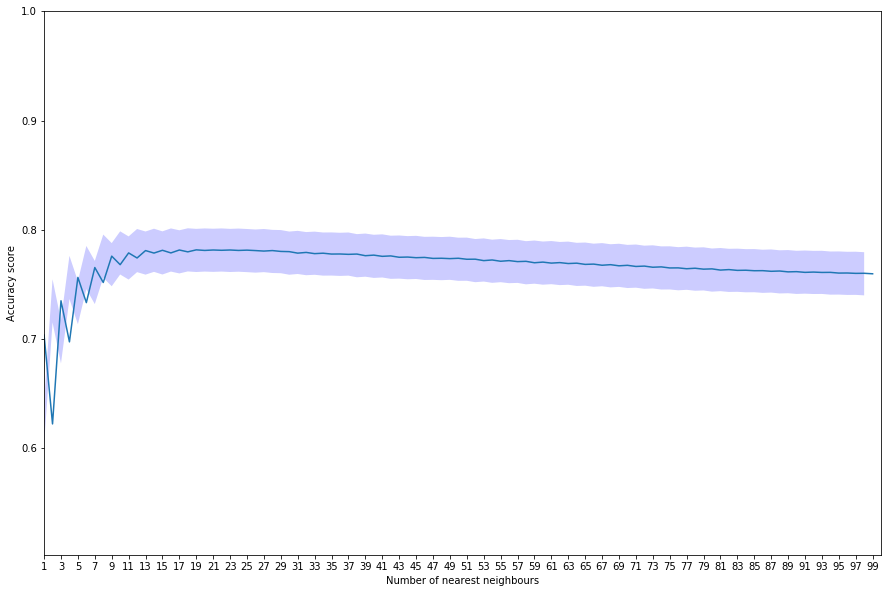

In [21]:
plt.figure(figsize=(15, 10))
plt.plot(range(1, n), means)
plt.fill_between(range(len(means)), means + stds, means - stds, alpha = 0.2, facecolor='blue')
plt.xlim(1, n)
plt.ylim(np.min(means - stds) - 0.1, 1)
plt.xticks(np.arange(1, n, 2))
plt.xlabel('Number of nearest neighbours')
plt.ylabel('Accuracy score')
plt.show()

In [77]:
from sklearn.tree import DecisionTreeClassifier
params_DTC = {'max_depth': list(range(1, n))}
GSmodel_DTC = GridSearchCV(DecisionTreeClassifier(), params_DTC)
GSmodel_DTC.fit(real_data, money_binar)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [78]:
means = []
stds = []
means = GSmodel_DTC.cv_results_['mean_test_score']
stds = np.sqrt(np.var(GSmodel_DTC.cv_results_['mean_test_score']))

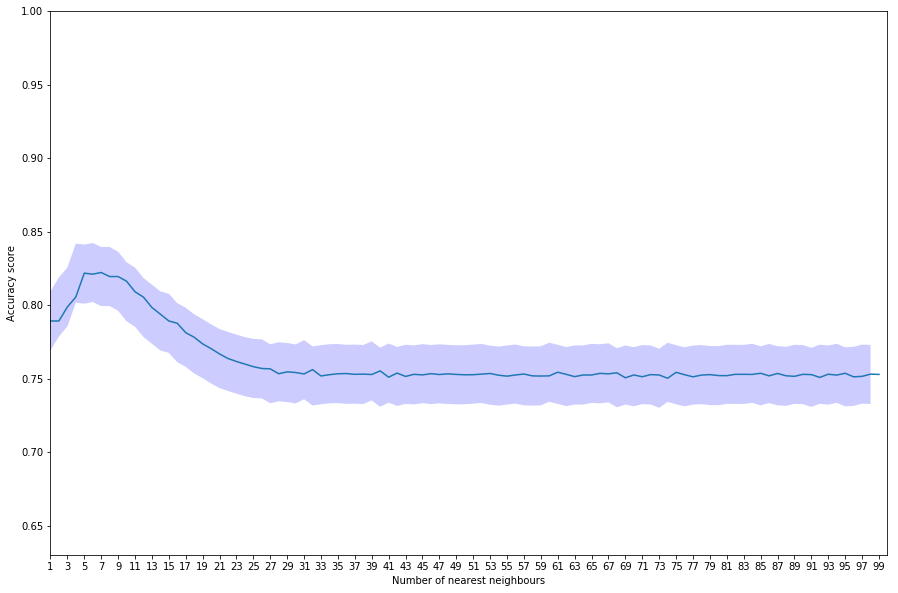

In [79]:
plt.figure(figsize=(15, 10))
plt.plot(range(1, n), means)
plt.fill_between(range(len(means)), means + stds, means - stds, alpha = 0.2, facecolor='blue')
plt.xlim(1, n)
plt.ylim(np.min(means - stds) - 0.1, 1)
plt.xticks(np.arange(1, n, 2))
plt.xlabel('Max depth')
plt.ylabel('Accuracy score')
plt.show()

In [81]:
from sklearn.linear_model import SGDClassifier
list_parm = ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']
params_SGDC = {'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']}
GSmodel_SGDC = GridSearchCV(SGDClassifier(), params_SGDC)
GSmodel_SGDC.fit(real_data, money_binar)

GridSearchCV(cv=None, error_score='raise',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [82]:
means = GSmodel_SGDC.cv_results_['mean_test_score']
stds = np.sqrt(np.var(GSmodel_SGDC.cv_results_['mean_test_score']))

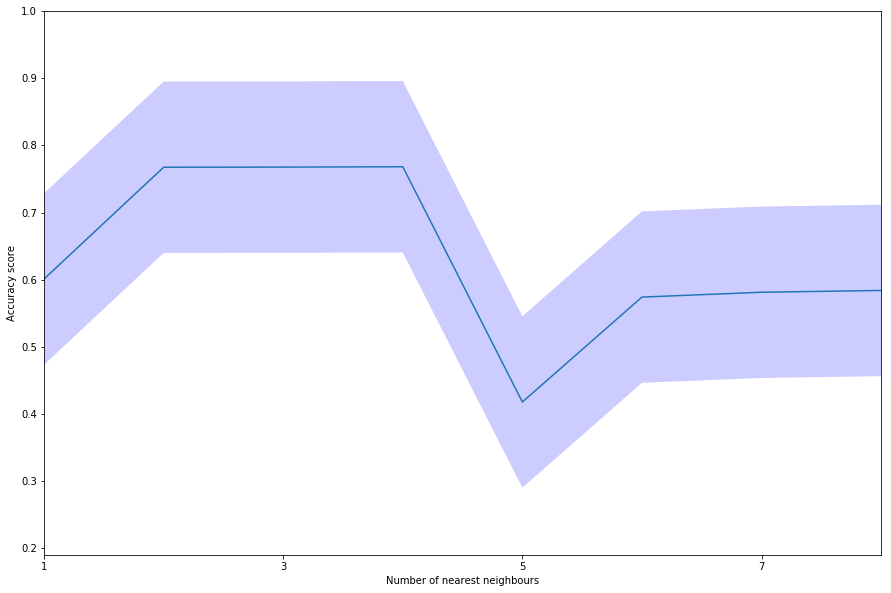

In [94]:
plt.figure(figsize=(15, 10))
plt.plot(range(9), means)
plt.fill_between(range(len(means)), means + stds, means - stds, alpha = 0.2, facecolor='blue')
plt.xlim(1, 8)
plt.ylim(np.min(means - stds) - 0.1, 1)
plt.xticks(np.arange(1, 9, 2))
plt.xlabel('Number of nearest neighbours')
plt.ylabel('Accuracy score')
plt.show()

**3. (2 балла)** Теперь подберём число деревьев (*n_estimators*) в алгоритме RandomForest. Как известно, в общем случае Random Forest не переобучается с увеличением количества деревьев. Подберите количество деревьев, начиная с которого качество на кросс-валидации стабилизируется. Обратите внимание, что для проведения этого эксперимента не нужно с нуля обучать много случайных лесов с различными количествами деревьев: обучите один случайный лес с максимальным интересным количеством деревьев, а затем рассмотрите подмножества деревьев разных размеров, состоящие из деревьев построенного леса (поле [*estimators_*](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)). В дальнейших экспериментах используйте найденное количество деревьев.

Применить класс *GridSearchCV* в данном задании затруднительно, поэтому предлагается самостоятельно написать цикл по числу деревьев или воспользоваться параметром `warm_start=True` ([stackoverflow](https://stackoverflow.com/questions/31808821/python-random-forest-iteratively-adding-trees)).

In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss

errors = []
growing_rf = RandomForestClassifier(n_estimators=10, n_jobs=-1,  
                                    warm_start=True, random_state=1514)
for i in range(40):
    growing_rf.fit(real_data, money_binar)
    growing_rf.n_estimators += 5
    errors.append(log_loss(money_binar, growing_rf.predict_proba(real_data)))

_ = plt.plot(errors, '-r')

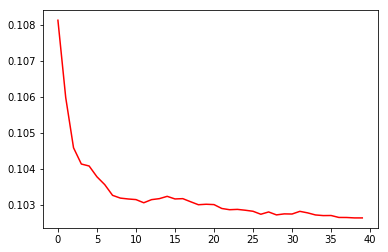

In [111]:
plt.show()

Ниже представлен график зависимости ошибки к количеству деревьев, для 150 деревьев

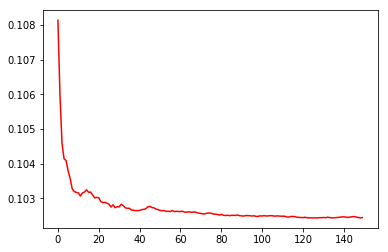

In [109]:
plt.show()

** 4. (2 балла)** Посмотрите на значения признаков *age*, *fnlwgt*, *capital-gain*. В чем заключается особенность данных? На какие из рассматриваемых алгоритмов это может повлиять? Может ли масштабирование повлиять на работу этих алгоритмов?

** 5. (2 балла)** Отмасштабируйте все вещественные признаки одним из указанных выше способов и подберите оптимальные значения гиперпараметров аналогично пункту выше.

Изменилось ли качество некоторых алгоритмов и почему?

In [8]:
from sklearn.preprocessing import normalize

norm_data = normalize(real_data)
norm_data

array([[  1.19363737e-04,   9.99997796e-01,   3.15962834e-05,
          2.08535471e-03,   0.00000000e+00,   2.10641890e-04],
       [  2.10205466e-04,   9.99999954e-01,   5.25513666e-05,
          0.00000000e+00,   0.00000000e+00,   2.10205466e-04],
       [  2.02408653e-04,   9.99999952e-01,   7.30920137e-05,
          0.00000000e+00,   0.00000000e+00,   2.24898504e-04],
       ..., 
       [  2.58479536e-04,   9.99999886e-01,   1.24453110e-04,
          0.00000000e+00,   0.00000000e+00,   3.82932646e-04],
       [  2.19575727e-04,   9.99999964e-01,   3.34946024e-05,
          0.00000000e+00,   0.00000000e+00,   1.48864900e-04],
       [  5.58246846e-04,   9.99481770e-01,   2.19915424e-04,
          0.00000000e+00,   3.21753182e-02,   7.61245700e-04]])

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(real_data))
data_scaled = scaler.transform(real_data)
data_scaled

MinMaxScaler(copy=True, feature_range=(0, 1))


array([[ 0.23287671,  0.18120681,  0.53333333,  0.00594006,  0.        ,
         0.60204082],
       [ 0.31506849,  0.11668326,  0.6       ,  0.        ,  0.        ,
         0.39795918],
       [ 0.26027397,  0.10819959,  0.8       ,  0.        ,  0.        ,
         0.39795918],
       ..., 
       [ 0.1369863 ,  0.05811029,  0.8       ,  0.        ,  0.        ,
         0.39795918],
       [ 0.57534247,  0.17019073,  0.53333333,  0.        ,  0.        ,
         0.39795918],
       [ 0.21917808,  0.0271468 ,  0.8       ,  0.        ,  0.48769231,
         0.44897959]])

In [23]:
from sklearn.neighbors import KNeighborsClassifier
params_KNC = {'n_neighbors': list(range(1, n))}
GSmodel_KNC = GridSearchCV(KNeighborsClassifier(), params_KNC, cv=5)
GSmodel_KNC.fit(data_scaled, money_binar)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

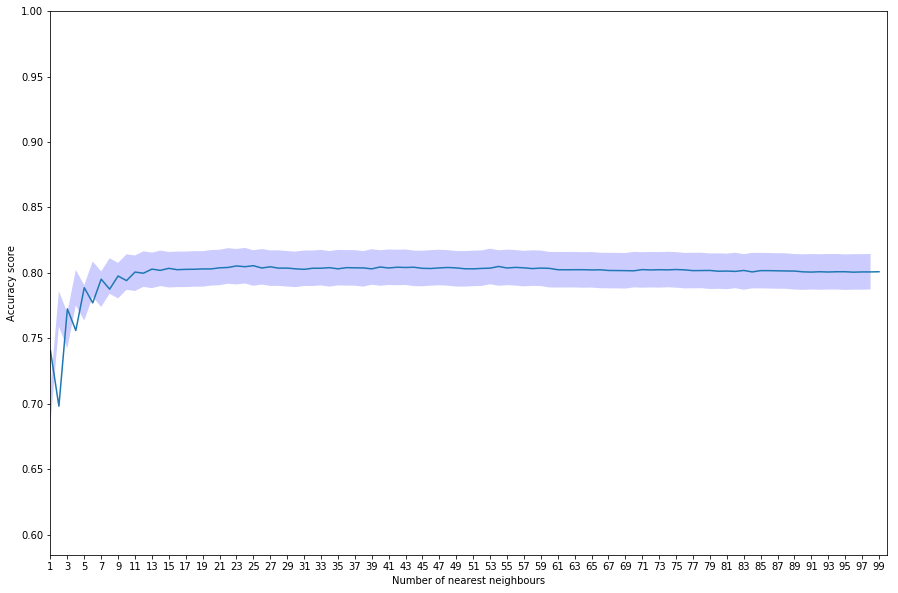

In [24]:
import numpy as np
means_s1 = GSmodel_KNC.cv_results_['mean_test_score']
stds_s1 = np.sqrt(np.var(GSmodel_KNC.cv_results_['mean_test_score']))
plt.figure(figsize=(15, 10))
plt.plot(range(1, n), means_s1)
plt.fill_between(range(len(means_s1)), means_s1 + stds_s1, means_s1 - stds_s1, alpha = 0.2, facecolor='blue')
plt.xlim(1, n)
plt.ylim(np.min(means_s1 - stds_s1) - 0.1, 1)
plt.xticks(np.arange(1, n, 2))
plt.xlabel('Number of nearest neighbours')
plt.ylabel('Accuracy score')
plt.show()

In [25]:
from sklearn.tree import DecisionTreeClassifier
params_DTC = {'max_depth': list(range(1, n))}
GSmodel_DTC = GridSearchCV(DecisionTreeClassifier(), params_DTC)
GSmodel_DTC.fit(data_scaled, money_binar)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

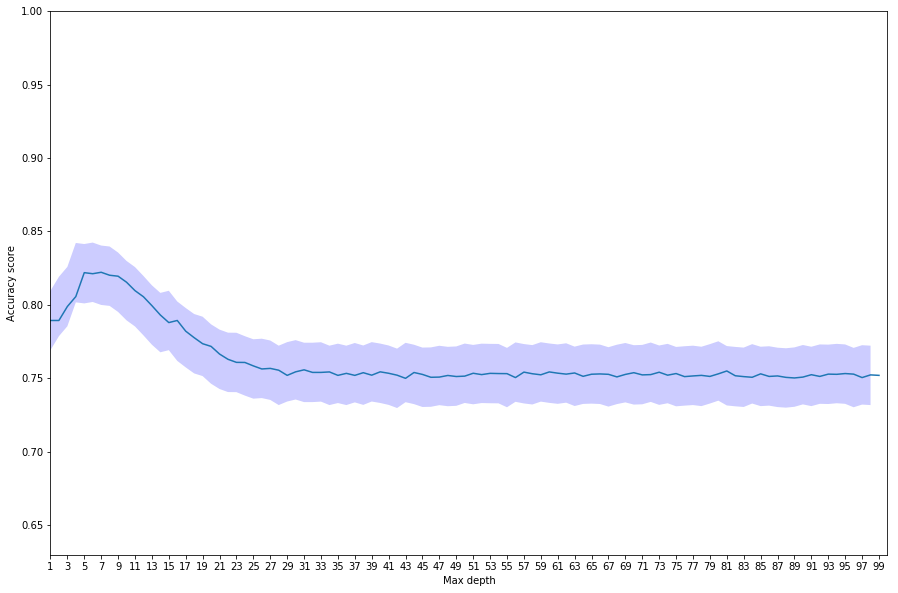

In [27]:
means_s2 = GSmodel_DTC.cv_results_['mean_test_score']
stds_s2 = np.sqrt(np.var(GSmodel_DTC.cv_results_['mean_test_score']))
plt.figure(figsize=(15, 10))
plt.plot(range(1, n), means_s2)
plt.fill_between(range(len(means_s2)), means_s2 + stds_s2, means_s2 - stds_s2, alpha = 0.2, facecolor='blue')
plt.xlim(1, n)
plt.ylim(np.min(means_s2 - stds_s2) - 0.1, 1)
plt.xticks(np.arange(1, n, 2))
plt.xlabel('Max depth')
plt.ylabel('Accuracy score')
plt.show()

In [28]:
from sklearn.linear_model import SGDClassifier
list_parm = ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']
params_SGDC = {'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']}
GSmodel_SGDC = GridSearchCV(SGDClassifier(), params_SGDC)
GSmodel_SGDC.fit(data_scaled, money_binar)

GridSearchCV(cv=None, error_score='raise',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [29]:
means_s3 = GSmodel_SGDC.cv_results_['mean_test_score']
stds_s3 = np.sqrt(np.var(GSmodel_SGDC.cv_results_['mean_test_score']))
plt.figure(figsize=(15, 10))
plt.plot(range(9), means)
plt.fill_between(range(len(means_s3)), means_s3 + stds_s3, means_s3 - stds_s3, alpha = 0.2, facecolor='blue')
plt.xlim(1, 8)
plt.ylim(np.min(means_s3 - stds_s3) - 0.1, 1)
plt.xticks(np.arange(1, 9, 2))
plt.xlabel('Number of nearest neighbours')
plt.ylabel('Accuracy score')
plt.show()

ValueError: x and y must have same first dimension, but have shapes (9,) and (99,)

** 6. (2 балла)** Теперь сделайте перебор нескольких гиперпараметров по сетке и найдите оптимальные комбинации (лучшее среднее значение качества) для каждого алгоритма в данном случае: 
 - KNN — число соседей (*n_neighbors*) и метрика (*metric*)
 - DecisonTree — глубина дерева (*max_depth*) и критерий разбиения (*criterion*)
 - RandomForest — критерий разбиения в деревьях (*criterion*) и максимальное число рассматриваемых признаков (*max_features*); используйте найденное ранее каличество деревьев
 - SGDClassifier — оптимизируемая функция (*loss*) и *penalty*
 
Обратите внимание, что эта операция может быть ресурсо- и трудоемкой. Как оптимизировать подбор параметров по сетке сказано в разделе "Подбор гиперпараметров модели".

Какой из алгоритмов имеет наилучшее качество? 

In [33]:
params_KNC2 = {'n_neighbors': list(range(1, n, 10)), 'metric': ['euclidean', 'manhattan', 'chebyshev']}
GSmodel_KNC2 = GridSearchCV(KNeighborsClassifier(), params_KNC, cv=5)
GSmodel_KNC2.fit(data_scaled, money_binar)

TypeError: __init__() takes exactly 2 positional arguments (1 given)

**7. (2 балла)** Постройте для разных алгоритмов графики [кривых обучения](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html), изображающие зависимость качества на тестовой и обучающей выборках от количества объектов, на которых обучаются модели. Посмотрите на поведение кривых и ответьте на вопросы:
* Может ли с ростом числа объектов убывать качество на тестовой выборке? А на обучающей? Почему?
* Для каких целей можно использовать знание качества на обучающей части выборки?
* Какой из алгоритмов лучше обучается на меньшем числе объектов?
* Может ли добавление новых объектов значительно повысить качество какого-то из алгоритмов или при существующем наборе данных для всех алгоритмов произошло насыщение?

Пока мы не использовали нечисловые признаки, которые есть в датасете. Давайте посмотрим, правильно ли мы сделали и увеличится ли качество моделей после добавлениях этих признаков. 

**8. (1 балл)** Преобразуйте все категориальные признаки с помощью метода one-hot-encoding (например, это можно сделать с помощью функции [pandas.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) или [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) / [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) из sklearn).

Так как после кодирования признаков получилось достаточно много, в этой работе мы не будем подбирать заново оптимальные гиперпараметры для моделей с учетом новых признаков (хотя правильнее было бы это сделать). 

**9. (1 балл)** Добавьте к масштабированным вещественным признакам закодированные категориальные и обучите алгоритмы с наилучшими гиперпараметрами, найденными ранее. Дало ли добавление новых признаков прирост качества? Измеряйте качество, как и раньше, используя 5-Fold CV. Для этого удобно воспользоваться функцией [cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.cross_val_score.html#sklearn.cross_validation.cross_val_score).

Отличается ли теперь наилучший классификатор от наилучшего в предыдущем пункте?

### 2. (5 баллов) Композиция моделей

Во всех предыдущих пунктах мы получили много сильных моделей, которые могут быть достаточно разными по своей природе (например, метод ближайших соседей и случайный лес). Часто на практике оказывается возможным увеличить качество предсказания путем смешивания разных моделей. Давайте посмотрим, действительно ли такой подход дает прирост в качестве.

Выберете из построенных моделей двух предыдущих пунктов две, которые дали наибольшее начество на кросс-валидации (обозначим их $clf_1$ и $clf_2$). Далее постройте новый классификатор, ответ которого на некотором объекте $x$ будет выглядеть следующим образом:

$$result(x) = clf_1(x) \cdot \alpha + clf_2(x) \cdot (1 - \alpha)$$

где $\alpha\in [0, 1]$ — гиперпараметр нового классификатора.

**1. (3 балла)**
При реализации своих моделей хорошей практикой является создание sklearn-совместимых классов. Во-первых, такая реализация будет иметь стандартный интерфейс и позволит другим людям безболезненно обучать реализованные вами модели. Во-вторых, появляется возможность использовать любой функционал пакета sklearn, принимающий на вход модель, например, класс *GridSearchCV*, *learning_curve* и другие.

Создайте классификатор, который инициализируется двумя произвольными классификаторами и параметром $\alpha$. Во время обучения такой классификатор должен обучать обе базовые модели, а на этапе предсказания замешивать предсказания базовых моделей по формуле, указанной выше. 

Для создания пользовательского классификатора необходимо отнаследоваться от базовых классов *[BaseEstimator](http://scikit-learn.org/stable/modules/generated/sklearn.base.BaseEstimator.html), [ClassifierMixin](http://scikit-learn.org/stable/modules/generated/sklearn.base.ClassifierMixin.html)* и реализовать методы *\_\_init\_\_, fit, predict и predict_proba*. Пример sklearn-совместимого классификатора с комментариями можно найти [здесь](http://scikit-learn.org/stable/developers/contributing.html#rolling-your-own-estimator)

**2. (2 балла)** Подберите по сетке от 0 до 1 значение $\alpha$ для этого классификатора. Если класс реализован правильно, то вы cможете использовать *GridSearchCV*, как в случае с обычными классификаторами.

Изобразите на графике среднее качество по фолдам и доверительный интервал в зависимости от $\alpha$.

Дал ли этот подход прирост к качеству по сравнению с моделями, обученными по-отдельности? Поясните, почему даже простой блендинг моделей может влять на итоговое качество?

### 3. (5 баллов) Сравнение построенных моделей

![](http://cdn.shopify.com/s/files/1/0870/1066/files/compare_e8b89647-3cb6-4871-a976-2e36e5987773.png?1750043340268621065)

После того как было построено много моделей правильным продолжением является сравнение их между собой. На семинаре по визуализации вам было показано как строить "ящик с усами" (диаграмму размаха). Воспользуемся ей для сравнения алгоритмов между собой. 

**1. (5 баллов)** Для каждого типа классификатора (KNeighborClassifier, DecisionTreeClassifier, RandomForestClassifier, SGDClassifier), а так же смешанной модели, выберете тот, которых давал наилучшее качество на кросс-валидации и постройте диаграмму размаха. Все классификаторы должны быть изображены на одном графике.
 
Сделайте общие итоговые выводы о классификаторах с точки зрения их работы с признаками и сложности самой модели (какие гиперпараметры есть у модели, сильно ли изменение значения гиперпараметра влияет на качество модели).

### 4. (15 баллов) Бонусное задание

**1. (5 баллов)** Продолжим работать с датасетом `data.adult.csv`. Сделайте двухуровневый [стекинг моделей](https://alexanderdyakonov.wordpress.com/2017/03/10/c%D1%82%D0%B5%D0%BA%D0%B8%D0%BD%D0%B3-stacking-%D0%B8-%D0%B1%D0%BB%D0%B5%D0%BD%D0%B4%D0%B8%D0%BD%D0%B3-blending/).
На нулевом уровне (в качестве базовых классификаторов) используйте пять лучших ранее полученных моделей. На первом уровне (в качестве метаклассификатора) используйте логистическую регрессию (LogisticRegressionCV), у которой подберите по сетке параметры `penalty` и `C` на метапризнаках. Для стекинга используйте библиотеку [brew](https://pypi.python.org/pypi/brew/0.1.4) или сделайте свою собственную реализацию классического стекинга.
Постройте `barplot`, на котором изобразите метрику качества каждой базовой модели нулевого уровня и самого метаклассификатора.

**2. (5 баллов)** Предложите алгоритм оптимального бинарного решающего дерева для задачи регресси на $l$ объектах в $n$-мерном пространстве с асимптотической сложностью $O(nl\log l)$. В качестве предикатов нужно рассматривать пороговые правила (наиболее распространенный случай для использования на практике). Для простоты можно считать, что получающееся дерево близко у сбалансированному и в качестве ошибки используется MSE:
$$
Q = \frac{1}{l}\sum_{i=1}^{l}(y_i - \tilde y_i)^2
$$

Под оптимальностью в данной задаче подразумевается, что в каждом узле дерева делается оптимальное с точки зрения MSE разбиение на два поддерева.

**3. (2+3 баллов)** Пусть имеется построенное решающее дерево для задачи многоклассовой классификации. Рассмотрим лист дерева с номером $m$ и объекты $R_m$ , попавшие в него. Обозначим за $p_{mk}$ долю объектов
$k$-го класса в листе $m$. Индексом Джини этого листа называется величина
$$
\sum_{k=1}^K p_{mk}(1 − p_{mk} ),
$$
где $K$ — общее количество классов. Индекс Джини обычно служит мерой того, насколько хорошо
в данном листе выделен какой-то один класс (так называемая [impurity function](https://onlinecourses.science.psu.edu/stat857/node/52)).
1. Поставим в соответствие листу $m$ алгоритм классификации $a(x)$, который предсказывает класс
случайно, причем класс $k$ выбирается с вероятностью $p_{mk}$ . Покажите, что матожидание ча-
стоты ошибок этого алгоритма на объектах из R m равно индексу Джини.
2. Дисперсией класса k назовем дисперсию выборки $\{[y_i = k] : x_i \in R_m\}$, где $y_i$ — класс объекта $x_i$ , $[f ]$ — индикатор истинности выражения $f$, равный 1 если $f$ верно, и нулю в противном
случае, а $R_m$ — множество объектов в листе. Покажите, что сумма дисперсий всех классов в
заданном листе равна его индексу Джини.